# Tarea 1-Estadística Aplicada II

In [1]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

In [2]:
usePackage("ggplot2")
usePackage("hrbrthemes")

Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"

In [3]:
Y <- c(1.71,1.52,1.29,3.09,2.21,2.26,2.4,2.1,1.96,2.09,
    2.02,1.31,2.17,2.28,2.41,2.23,3.04,2.06,2.73,2.36)

X <- c(1,1.08,1.15,1.15,1.2,1.3,1.37,1.37,1.43,1.46,
    1.52,1.57,1.65,1.65,1.65,1.66,1.87,2.03,2.05,2.3)

datos_acres <- data.frame(
"Cociente" = X,
"Acres" = Y
)

head(datos_acres)

,Cociente,Acres
,<dbl>,<dbl>
1,1.00,1.71
2,1.08,1.52
3,1.15,1.29
4,1.15,3.09
5,1.20,2.21
6,1.30,2.26


In [4]:
usePackage("writexl")
write_xlsx(datos_acres,"datosAcres.xlsx")

Warning message:
"package 'writexl' was built under R version 3.6.3"

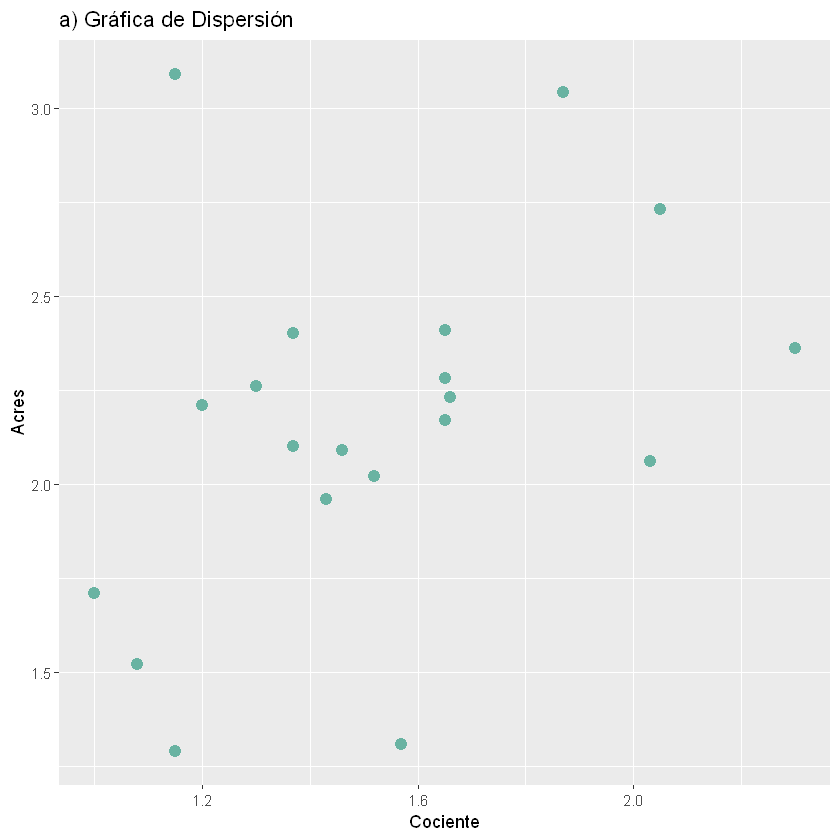

In [5]:
p1 <- ggplot(datos_acres, aes(x=Cociente, y=Acres)) + 
  geom_point( color="#69b3a2",size=3)+ggtitle("a) Gráfica de Dispersión")
p1

 b) ¿Cree que exista una relación entre la intensidad del trabajo agrícola y el cociente consumidor /
productor?

Sí, la gráfica sugiere que mientras más grande es el cociente consumidor/productor por hogar mayor es el número de acres trabajados por ese hogar.

c)  Ajuste una recta de regresión estimando los parámetros de la recta de regresión y la varianza.


In [6]:
#Calculamos las medias
media_cociente <- mean(datos_acres$Cociente)
media_acres <- mean(datos_acres$Acres)

In [7]:
#Sxx
Sxx <- sum((datos_acres$Cociente-media_cociente)^2)
Sxy <- sum((datos_acres$Cociente-media_cociente)*(datos_acres$Acres-media_acres))


In [8]:
#Estimamos \beta_1 y \beta_0
beta_1 <- Sxy/Sxx
beta_0<-media_acres-beta_1*media_cociente
c(beta_0,beta_1)

[1] 1.3756445 0.5163201

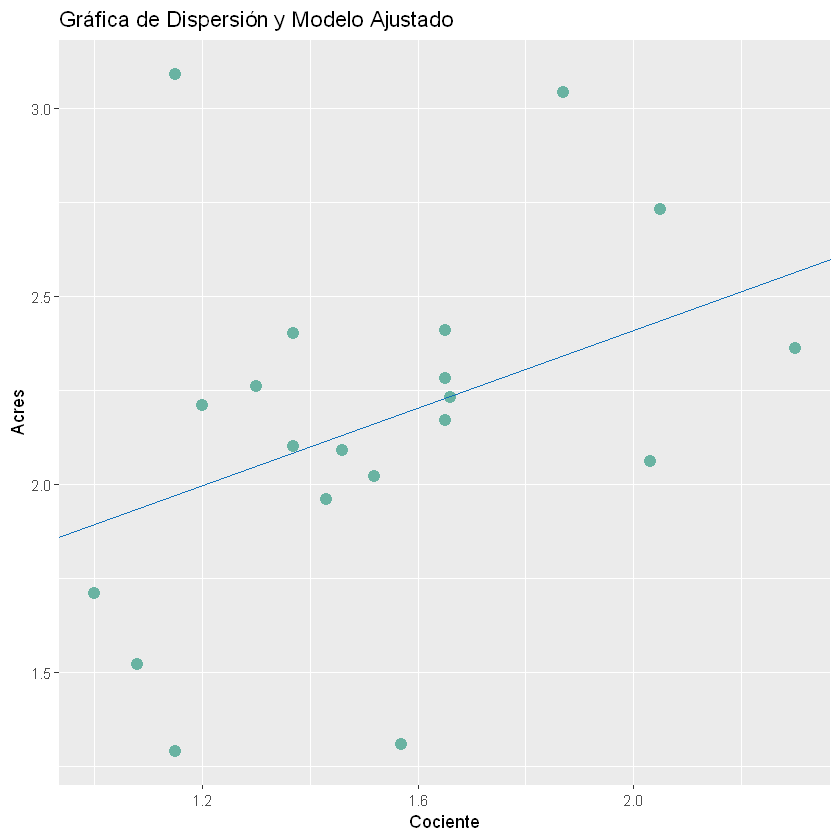

In [9]:
p2 <- ggplot(datos_acres, aes(x=Cociente, y=Acres)) + 
  geom_point( color="#69b3a2",size=3)+ggtitle("Gráfica de Dispersión y Modelo Ajustado")+geom_abline(
      slope = beta_1,intercept = beta_0,color = "#0F71BB")
p2


In [10]:
#Agregamos Y ajustada
datos_acres$Acres_ajustado <- beta_0+beta_1*(datos_acres$Cociente)

#Calculamos entonces el estimador de varianza
sigma_estimador <- sum((datos_acres$Acres-datos_acres$Acres_ajustado)^2)
sigma_estimador <- sigma_estimador/(length(datos_acres$Acres)-2)
sigma_estimador

[1] 0.2064047